In [21]:
import albumentations as A
import numpy as np
import cv2
import os
from pathlib import Path
from tqdm import tqdm
from matplotlib import pyplot as plt

In [18]:
aug_titles = ['Original','Composed','ShiftScaleRotate','RandomCorp','RGBShift','MultNoise','HueSat','RandBrightContrast']
aug_list = [
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=360, always_apply=True),
        A.RandomCrop(height=256, width=256, always_apply=True),
        A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, always_apply=True),
        A.MultiplicativeNoise(multiplier=[0.5,2], per_channel=True, always_apply=True),
        A.HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit=0.2, val_shift_limit=0.2, always_apply=True),
        A.RandomBrightnessContrast(brightness_limit=(-0.1,0.1), contrast_limit=(-0.1, 0.1), always_apply=True)]
augCompose = A.Compose([
        A.SmallestMaxSize(max_size=350),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=360, p=0.5),
        A.RandomCrop(height=256, width=256),
        A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
        A.MultiplicativeNoise(multiplier=[0.5,2], per_channel=True, p=0.2),
        A.HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit=0.2, val_shift_limit=0.2, p=0.5),
        A.RandomBrightnessContrast(brightness_limit=(-0.1,0.1), contrast_limit=(-0.1, 0.1), p=0.5)])


In [6]:
def view_image(image, title=""):
    plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.title(title)
    plt.imshow(image)

In [110]:
def visualize_augmentations(images, idx=None, samples=10, ncols=5, random_cols=True, titles=aug_titles, figsize=(12, 8)):
    
    if not ncols or ncols >= (len(images[0])-2):
        ncols = len(images[0]) -2
    elif type(ncols) == "list":
        show_cols = np.array(ncols)

    print(f"Number of columns {ncols}")    
    if type(ncols) != "list":
        show_cols = np.random.choice(range(2,len(images[0])),ncols,replace=False)
        show_cols = np.insert(show_cols,0,range(2))
    
    ncols = len(show_cols)
    
    if samples > len(images):
        samples = len(images)

    if not idx:
        idx = np.random.choice(range(len(images)), samples, replace=False)


    titles = list(np.array(aug_titles)[show_cols])
 
    #https://stackoverflow.com/questions/46615554/how-to-display-multiple-images-in-one-figure-correctly
    # create figure (fig), and array of axes (ax)
    figure, ax = plt.subplots(nrows=samples, ncols=ncols, figsize=figsize)
    # ax enables access to manipulate each of subplots
    for i, axi in enumerate(ax.flat):
        rowid = i // ncols
        colid = i % ncols 
        img = images[idx[rowid]][show_cols[colid]]
        axi.imshow(img) 
        axi.set_axis_off()
        axi.set_title(f"{idx[rowid]}:{titles[colid]}")
    
    plt.tight_layout()
    plt.show()


In [87]:

train_dir = '/home/rmadhira86/w251/w251-finalproject/data/processed/cdetect/test/covid'
aug_prefix = [A.SmallestMaxSize(max_size=350)]

images = []
for f in tqdm(os.listdir(train_dir)):
    img = cv2.imread(str(Path(train_dir) / f))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    aug_img = augCompose(image = img)
    this_img = [img]
    this_img.append(aug_img['image'])
    for i, aug in enumerate(aug_list):
        augC = A.Compose(aug_prefix + [aug])
        augi_img = augC(image= img)
        this_img.append(augi_img['image'])
    images.append(this_img)




100%|██████████| 6/6 [00:00<00:00, 79.98it/s]


Number of columns 6


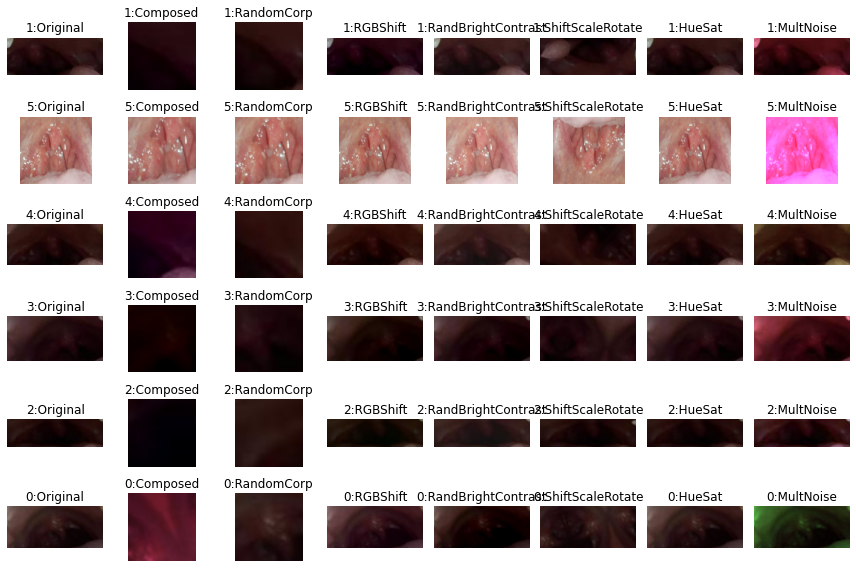

In [112]:
visualize_augmentations(images, samples=6, ncols=8)

In [54]:
cols = 5
if not cols:
    cols = len(images[0])
show_cols = np.random.choice(range(2,len(images[0])),cols,replace=False)
show_cols = np.insert(show_cols,0,range(2))
np.array(aug_titles)[show_cols]

array(['Original', 'Composed', 'MultNoise', 'RandBrightContrast',
       'HueSat', 'RandomCorp', 'ShiftScaleRotate'], dtype='<U18')

In [57]:
ndim(images)

NameError: name 'ndim' is not defined